| Model               | FiveVTS | Chickenpox | Pedalme | Wikimath | Windmillsmall | MontevideoBus |
|---------------------|---------|------------|---------|----------|---------------|---------------|
| Max iter.           | 30      | 30         | 30      | 30       | 30            | 30            |
| Epochs              | 50      | 50         | 50      | 50       | 50            | 50            |
| Lags                | 2       | 4          | 4       | 8        | 8             | 4             |
| Interpolation       | linear  | linear     | nearest | linear   | linear        | nearest       |
| Filters             |         |            |         |          |               |               |
| GConvGRU            | 12      | 16         | 12      | 12       | 12            | 12            |
| GConvLSTM           | 12      | 32         | 2       | 64       | 16            | 12            |
| GCLSTM              | 4       | 16         | 4       | 64       | 16            | 12            |
| LRGCN               | 4       | 8          | 8       | 32       | 12            | 2             |
| DyGrEncoder         | 12      | 12         | 12      | 12       | 12            | 12            |
| EvolveGCNH          | No need | No need    | No need | No need  | No need       | No need       |
| EvolveGCNO          | No need | No need    | No need | No need  | No need       | No need       |
| TGCN                | 12      | 12         | 12      | 12       | 12            | 8             |
| DCRNN               | 2       | 16         | 8       | 12       | 4             | 12            |


In [3]:
import pandas as pd

import itstgcnTGCN
import torch
import itstgcnTGCN.planner 

In [4]:
from torch_geometric_temporal.dataset import PedalMeDatasetLoader
loader2 = PedalMeDatasetLoader()

In [25]:
plans_stgcn_rand = {
    'max_iteration': 30, 
    'method': ['STGCN', 'IT-STGCN'],
    'mrate': [0],
    'lags': [4], 
    'nof_filters': [12], 
    'inter_method': ['linear'],
    'epoch': [50]
}

In [ ]:
plnr = itstgcnTGCN.planner.PLNR_STGCN_RAND(plans_stgcn_rand,loader2,dataset_name='pedalme')
plnr.simulate()

In [28]:
pd.read_csv('./simulation_results/2024-02-04_09-48-52.csv').groupby('method').mean('mse')

,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time
method,,,,,,,,
IT-STGCN,0.0,NaN,4.0,12.0,NaN,10.0,1.225029,0.899266
STGCN,0.0,NaN,4.0,12.0,NaN,10.0,1.224953,0.648451


In [29]:
pd.read_csv('./simulation_results/2024-02-04_09-46-52.csv').groupby('method').mean('mse')

,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time
method,,,,,,,,
IT-STGCN,0.0,NaN,4.0,12.0,NaN,10.0,1.23277,0.799035
STGCN,0.0,NaN,4.0,12.0,NaN,10.0,1.21171,0.603974


In [30]:
pd.read_csv('./simulation_results/2024-02-04_09-47-32.csv').groupby('method').mean('mse')

,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time
method,,,,,,,,
IT-STGCN,0.0,NaN,4.0,12.0,NaN,50.0,1.283556,3.191565
STGCN,0.0,NaN,4.0,12.0,NaN,50.0,1.284180,2.613369


In [16]:
pd.concat([pd.read_csv('./simulation_results/2024-02-04_09-21-48.csv'),
          pd.read_csv('./simulation_results/2024-02-04_09-26-46.csv'),
          pd.read_csv('./simulation_results/2024-02-04_09-31-36.csv'),
          pd.read_csv('./simulation_results/2024-02-04_09-35-13.csv'),
          pd.read_csv('./simulation_results/2024-02-04_09-40-12.csv'),
          ]).groupby(['method']).mean('mse')

,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time
method,,,,,,,,
IT-STGCN,0.0,NaN,4.0,12.0,NaN,50.0,1.316835,4.958968
STGCN,0.0,NaN,4.0,12.0,NaN,50.0,1.271410,3.720265


# Check

---

In [32]:
import torch_geometric_temporal

In [33]:
dataset = loader2.get_dataset(lags=4)

In [34]:
train_dataset, test_dataset = torch_geometric_temporal.signal.temporal_signal_split(dataset, train_ratio=0.8)

In [35]:
mtype = None
inter_method = None 

In [7]:
method = 'STGCN'
lrnr = itstgcnTGCN.StgcnLearner(train_dataset,dataset_name='pedalme')
lrnr.learn(filters=12,epoch=1)
evtor = itstgcnTGCN.Evaluator(lrnr,train_dataset,test_dataset)
evtor.calculate_mse()
evtor.mse['test']['total']

/home/csy/Dropbox/ITTGNN_blog/posts/2_research/itstgcnTGCN/learners.py:84: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343998658/work/torch/csrc/utils/tensor_new.cpp:245.)
  self.lags = torch.tensor(train_dataset.features).shape[-1]


1.337457299232483

In [8]:
method = 'IT-STGCN'
lrnr = itstgcnTGCN.ITStgcnLearner(train_dataset,dataset_name='pedalme')
lrnr.learn(filters=12,epoch=1)
evtor = itstgcnTGCN.Evaluator(lrnr,train_dataset,test_dataset)
evtor.calculate_mse()
evtor.mse['test']['total']

1.200137734413147

---

In [81]:
import itstgcnTGCN

In [82]:
from torch_geometric_temporal.dataset import PedalMeDatasetLoader
loader2 = PedalMeDatasetLoader()

In [83]:
import torch_geometric_temporal

In [85]:
dataset = loader2.get_dataset(lags=4)

In [86]:
train_dataset, test_dataset = torch_geometric_temporal.signal.temporal_signal_split(dataset, train_ratio=0.8)

In [87]:
f,lags = itstgcnTGCN.convert_train_dataset(train_dataset)

In [94]:

from rpy2.robjects.vectors import FloatVector
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri as rpyn
GNAR = importr('GNAR') # import GNAR 
#igraph = importr('igraph') # import igraph 

ebayesthresh = importr('EbayesThresh').ebayesthresh

In [95]:
f = np.array(f)
if len(f.shape)==1: f = f.reshape(-1,1)
T,N = f.shape
Psi = itstgcnTGCN.make_Psi(T)
fbar = Psi.T @ f # apply dft 
fbar_threshed = np.stack([ebayesthresh(FloatVector(fbar[:,i])) for i in range(N)],axis=1)
fhat = Psi @ fbar_threshed # inverse dft 

In [100]:
itstgcnTGCN.update_from_freq_domain(f,None) - f

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

---
                

In [51]:
import matplotlib.pyplot as plt

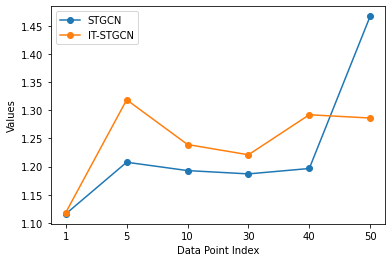

In [69]:
train_1 = []
test_1 = []
train_2 = []
test_2 = []
for i in [1,5,10,30,40,50]:
    method = 'STGCN'
    lrnr = itstgcnTGCN.StgcnLearner(train_dataset,dataset_name='pedalme')
    lrnr.learn(filters=12,epoch=i)
    evtor = itstgcnTGCN.Evaluator(lrnr,train_dataset,test_dataset)
    evtor.calculate_mse()
    train_1.append(evtor.mse['train']['total'])
    test_1.append(evtor.mse['test']['total'])
    
    method = 'IT-STGCN'
    lrnr = itstgcnTGCN.StgcnLearner(train_dataset,dataset_name='pedalme')
    lrnr.learn(filters=12,epoch=i)
    evtor = itstgcnTGCN.Evaluator(lrnr,train_dataset,test_dataset)
    evtor.calculate_mse()
    train_2.append(evtor.mse['train']['total'])
    test_2.append(evtor.mse['test']['total'])
plt.plot(test_1, label='STGCN', marker='o')
plt.plot(test_2, label='IT-STGCN', marker='o')

plt.xlabel('Data Point Index')
plt.xticks([0,1,2,3,4,5], ['1','5','10','30','40','50'])
plt.ylabel('Values')
plt.legend()

# Display the plot
plt.show()

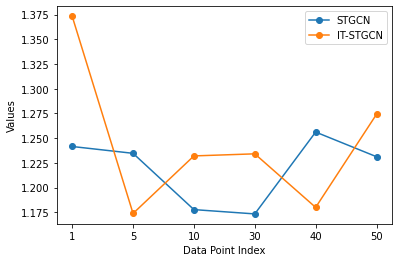

In [70]:
train_1 = []
test_1 = []
train_2 = []
test_2 = []
for i in [1,5,10,30,40,50]:
    method = 'STGCN'
    lrnr = itstgcnTGCN.StgcnLearner(train_dataset,dataset_name='pedalme')
    lrnr.learn(filters=12,epoch=i)
    evtor = itstgcnTGCN.Evaluator(lrnr,train_dataset,test_dataset)
    evtor.calculate_mse()
    train_1.append(evtor.mse['train']['total'])
    test_1.append(evtor.mse['test']['total'])
    
    method = 'IT-STGCN'
    lrnr = itstgcnTGCN.StgcnLearner(train_dataset,dataset_name='pedalme')
    lrnr.learn(filters=12,epoch=i)
    evtor = itstgcnTGCN.Evaluator(lrnr,train_dataset,test_dataset)
    evtor.calculate_mse()
    train_2.append(evtor.mse['train']['total'])
    test_2.append(evtor.mse['test']['total'])
plt.plot(test_1, label='STGCN', marker='o')
plt.plot(test_2, label='IT-STGCN', marker='o')

plt.xlabel('Data Point Index')
plt.xticks([0,1,2,3,4,5], ['1','5','10','30','40','50'])
plt.ylabel('Values')
plt.legend()

# Display the plot
plt.show()

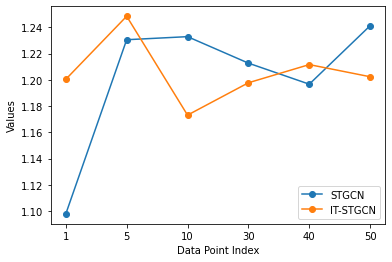

In [71]:
train_1 = []
test_1 = []
train_2 = []
test_2 = []
for i in [1,5,10,30,40,50]:
    method = 'STGCN'
    lrnr = itstgcnTGCN.StgcnLearner(train_dataset,dataset_name='pedalme')
    lrnr.learn(filters=12,epoch=i)
    evtor = itstgcnTGCN.Evaluator(lrnr,train_dataset,test_dataset)
    evtor.calculate_mse()
    train_1.append(evtor.mse['train']['total'])
    test_1.append(evtor.mse['test']['total'])
    
    method = 'IT-STGCN'
    lrnr = itstgcnTGCN.StgcnLearner(train_dataset,dataset_name='pedalme')
    lrnr.learn(filters=12,epoch=i)
    evtor = itstgcnTGCN.Evaluator(lrnr,train_dataset,test_dataset)
    evtor.calculate_mse()
    train_2.append(evtor.mse['train']['total'])
    test_2.append(evtor.mse['test']['total'])
plt.plot(test_1, label='STGCN', marker='o')
plt.plot(test_2, label='IT-STGCN', marker='o')

plt.xlabel('Data Point Index')
plt.xticks([0,1,2,3,4,5], ['1','5','10','30','40','50'])
plt.ylabel('Values')
plt.legend()

# Display the plot
plt.show()

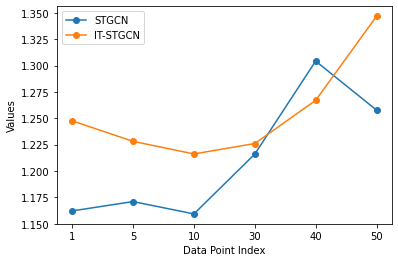

In [72]:
train_1 = []
test_1 = []
train_2 = []
test_2 = []
for i in [1,5,10,30,40,50]:
    method = 'STGCN'
    lrnr = itstgcnTGCN.StgcnLearner(train_dataset,dataset_name='pedalme')
    lrnr.learn(filters=12,epoch=i)
    evtor = itstgcnTGCN.Evaluator(lrnr,train_dataset,test_dataset)
    evtor.calculate_mse()
    train_1.append(evtor.mse['train']['total'])
    test_1.append(evtor.mse['test']['total'])
    
    method = 'IT-STGCN'
    lrnr = itstgcnTGCN.StgcnLearner(train_dataset,dataset_name='pedalme')
    lrnr.learn(filters=12,epoch=i)
    evtor = itstgcnTGCN.Evaluator(lrnr,train_dataset,test_dataset)
    evtor.calculate_mse()
    train_2.append(evtor.mse['train']['total'])
    test_2.append(evtor.mse['test']['total'])
plt.plot(test_1, label='STGCN', marker='o')
plt.plot(test_2, label='IT-STGCN', marker='o')

plt.xlabel('Data Point Index')
plt.xticks([0,1,2,3,4,5], ['1','5','10','30','40','50'])
plt.ylabel('Values')
plt.legend()

# Display the plot
plt.show()